# Introduction to Cross-Validation - Lab

## Introduction

In this lab, you'll be able to practice your cross-validation skills!


## Objectives

You will be able to:

- Compare the results with normal holdout validation
- Apply 5-fold cross validation for regression

## Let's get started

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [4]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target,columns = ['target'])

## Train test split

Perform a train-test-split with a test set of 0.20.

In [5]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 5) (404, 1)
(102, 5) (102, 1)


Fit the model and apply the model to the make test set predictions

In [8]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Calculate the residuals and the mean squared error

In [9]:
from sklearn.metrics import mean_squared_error
y_hat_test = lm.predict(X_test)
test_residuals = y_hat_test - y_test


test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

19.813266631297115

Text(0, 0.5, 'Predictions')

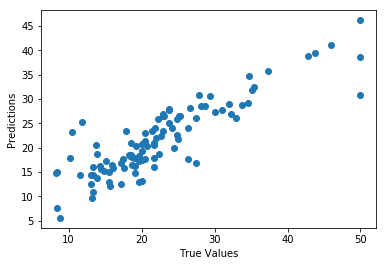

In [10]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## Cross-Validation: let's build it from scratch!

### Create a cross-validation function

Write a function k-folds that splits a dataset into k evenly sized pieces.
If the full dataset is not divisible by k, make the first few folds one larger then later ones.

We want the folds to be a list of subsets of data!

In [11]:
def kfolds(data, k):
    # Force data as pandas dataframe
    # add 1 to fold size to account for leftovers
    #Force data as pandas dataframe (optional but could be helpful)
    df = pd.DataFrame(data)
    #Be sure to account for the case where the dataset is not evenly divisible
    x = np.array_split(df, k)
    return x

### Apply it to the Boston Housing Data

In [12]:
# Make sure to concatenate the data again
bos_data = pd.concat([X.reset_index(drop=True), y], axis=1)

In [13]:
folds = kfolds(bos_data, k=10)

### Perform a linear regression for each fold, and calculate the training and test error

Perform linear regression on each and calculate the training and test error.

In [23]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(folds) if i!=n])
    test = folds[n]
    # Fit a linear regression model
    linreg = LinearRegression()
    linreg.fit(train[X.columns], train[y.columns])
    #Evaluate Train and Test Errors
    y_hat_train = linreg.predict(train[X.columns])
    y_hat_test = linreg.predict(test[X.columns])
    train_residuals = y_hat_train - train[y.columns]
    test_residuals = y_hat_test - test[y.columns]
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

[target    22.511221
dtype: float64, target    23.202722
dtype: float64, target    23.289877
dtype: float64, target    21.007887
dtype: float64, target    21.543949
dtype: float64]
[target    16.040807
dtype: float64, target    8.61985
dtype: float64, target    7.642481
dtype: float64, target    30.60502
dtype: float64, target    24.76944
dtype: float64]


## Cross-Validation using Scikit-Learn

This was a bit of work! Now, let's perform 5-fold cross-validation to get the mean squared error through scikit-learn. Let's have a look at the five individual MSEs and explain what's going on.

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")
cv_5_results

array([-13.40514492, -17.4440168 , -37.03271139, -58.27954385,
       -26.09798876])

Next, calculate the mean of the MSE over the 5 cross-validations and compare and contrast with the result from the train-test-split case.

##  Summary 

Congratulations! You now practiced your knowledge on k-fold crossvalidation!